In [693]:
!pip install ydata-profiling

In [694]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin

In [695]:
!pip install tensorflow

In [696]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score

In [697]:
from sklearn.model_selection import GridSearchCV

#Wczytanie danych#

In [698]:
dataset = pd.read_excel('/content/default_of_credit_card_clients.xls')
dataset.drop(index = dataset.index[0], inplace = True)
dataset.drop(columns = ['Unnamed: 0'], inplace = True)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [699]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

#Understanding data#

In [700]:
report = ProfileReport(dataset, title="Profiling Report")

#Analiza + przeksztalcenie#

In [701]:
working_dataset = dataset.copy()
working_dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [702]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # Nie uczymy niczego, więc zwracamy self

    def transform(self, X, y=None):
        X_copy = X.copy()

        #konwertowanie na poprawne typy danych
        int_cols = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5']
        float_cols = [col for col in working_dataset.columns if col not in int_cols]

        # Konwersja na liczby całkowite
        X_copy[int_cols] = X_copy[int_cols].astype(int)

        # Konwersja na liczby zmiennoprzecinkowe
        X_copy[float_cols] = X_copy[float_cols].astype(float)

        #Wartosc niesplaconego kredytu


        mapping_dict = {-2: 0, -1: 0, 0 : 1, 1: 2, 2: 2, 3 : 2, 4 : 2, 5 : 2, 6 : 2, 7 : 2, 8 : 2}

        #Zmniejszanie ilosci klas w X6 : X11
        X_copy['X6'] = X_copy['X6'].map(mapping_dict)
        X_copy['X7'] = X_copy['X7'].map(mapping_dict)
        X_copy['X8'] = X_copy['X8'].map(mapping_dict)
        X_copy['X9'] = X_copy['X9'].map(mapping_dict)
        X_copy['X10'] = X_copy['X10'].map(mapping_dict)
        X_copy['X11'] = X_copy['X11'].map(mapping_dict)

        #suma opoznienia splaty w miesiacach (0 - na czas, 1, do miesiaca, 2 - ponad miesiac)
        X_copy['X6:X11'] = X_copy['X6'] + X_copy['X7'] + X_copy['X8'] + X_copy['X9'] + X_copy['X10'] + X_copy['X11']
        X_copy.drop(columns = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11'], inplace = True)

        #Tworzenie nowych cech dla X1 z X18:X23
        X_copy['Credit liability'] = X_copy.apply(lambda x: x['X1'] - (x['X18'] + x['X19'] + x['X20'] + x['X21'] + x['X22'] + x['X23']), axis=1)
        X_copy.drop(columns = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17' ,'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X1'], inplace = True)

        return X_copy

In [703]:
working_dataset_final = FeatureEngineeringTransformer().fit_transform(working_dataset)
working_dataset_final

,X2,X3,X4,X5,Y,X6:X11,Credit liability
1,2,2,1,24,1,4,19311.0
2,2,2,2,26,1,7,115000.0
3,2,2,2,34,0,6,78982.0
4,2,2,1,37,0,6,41612.0
5,1,2,1,57,0,4,-9049.0
...,...,...,...,...,...,...,...
29996,1,3,1,39,0,6,177450.0
29997,1,3,2,43,0,2,135510.0
29998,1,2,2,37,1,8,-1300.0
29999,1,3,1,41,1,5,-67181.0


##feature_importance_#

In [704]:
X = working_dataset_final.drop(['Y'], axis = 1)
y = working_dataset_final['Y']

In [705]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [706]:
feature_importances = rf.feature_importances_

# Tworzymy DataFrame dla lepszej wizualizacji
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance_1': feature_importances})
importance_df = importance_df.sort_values(by='Importance_1', ascending=False)
print(importance_df)

            Feature  Importance_1
5  Credit liability      0.529469
3                X5      0.209954
4            X6:X11      0.194767
1                X3      0.032597
2                X4      0.019106
0                X2      0.014106


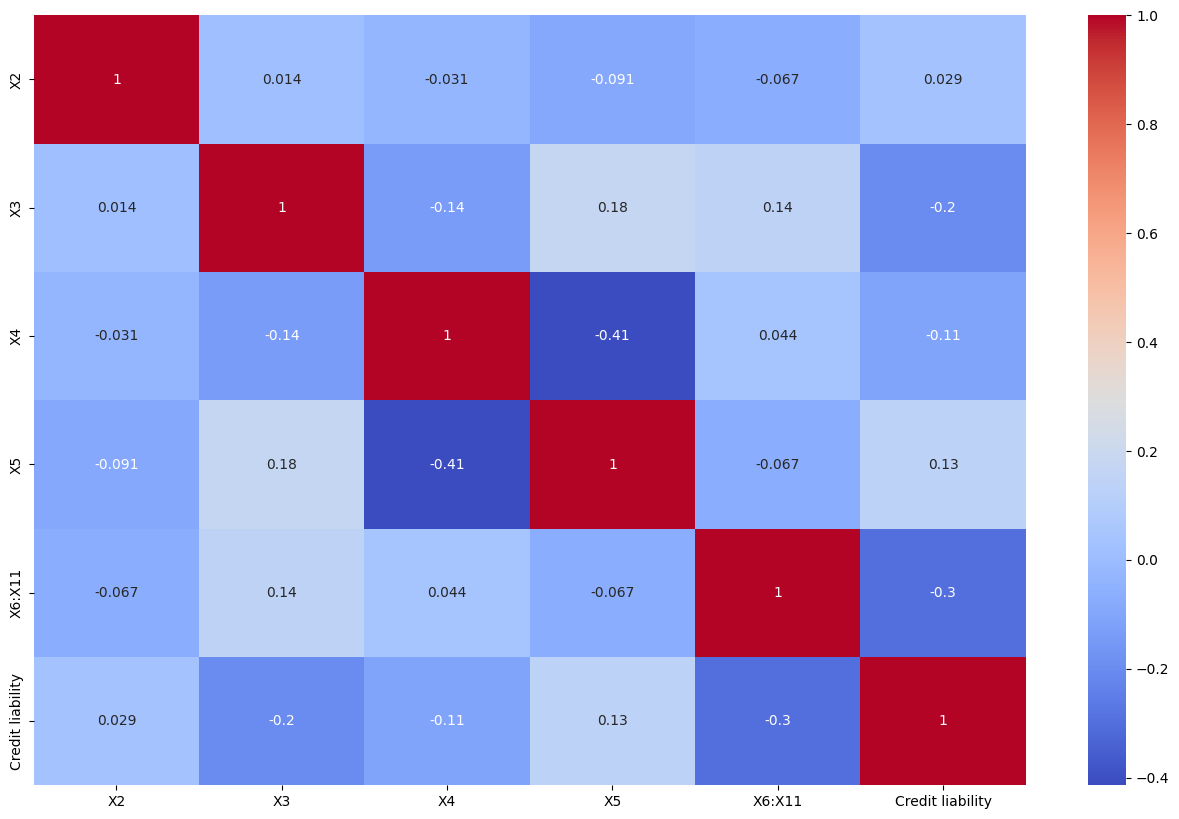

In [707]:
plt.figure(figsize=(16, 10))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

In [708]:
working_dataset_final

,X2,X3,X4,X5,Y,X6:X11,Credit liability
1,2,2,1,24,1,4,19311.0
2,2,2,2,26,1,7,115000.0
3,2,2,2,34,0,6,78982.0
4,2,2,1,37,0,6,41612.0
5,1,2,1,57,0,4,-9049.0
...,...,...,...,...,...,...,...
29996,1,3,1,39,0,6,177450.0
29997,1,3,2,43,0,2,135510.0
29998,1,2,2,37,1,8,-1300.0
29999,1,3,1,41,1,5,-67181.0


#Train_test_split#

In [709]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

##Zbiory walidacyjne#

In [710]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify= y_train, random_state=42)

#Wizualizacja + zapis#

In [711]:
results_df = pd.DataFrame(columns=['Model_Name',  'Precission - 0', 'Precission - 1', 'Procent Straty'])

def visualization(y_test, X_test, model, model_name):
  global results_df
  cm = confusion_matrix(y_test, model.predict(X_test))
  labels = [0, 1]

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print(classification_report(y_test, model.predict(X_test)))

  #Liczenie wartosci precission dla klas
  precission = precision_score(y_test, model.predict(X_test), average=None)
  strata = np.around(((1 -precission[1]) + (1 - precission[0])) * 50, 2)



  results_df = pd.concat([results_df, pd.DataFrame([{"Model_Name": model_name,
                                                        'Precission - 0' : precission[0],
                                                        'Precission - 1' : precission[1],
                                                        'Procent Straty' : f'{strata}%'
                                                     }])], ignore_index=True)

  return results_df

#BaseModel#

In [712]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

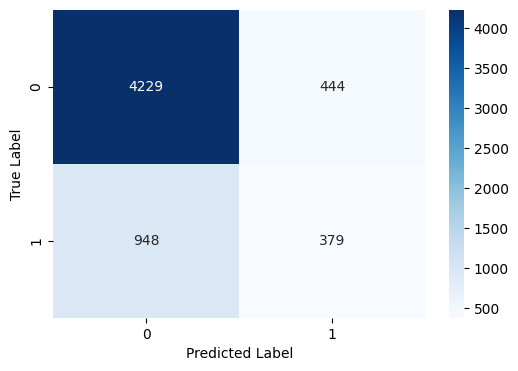

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4673
           1       0.46      0.29      0.35      1327

    accuracy                           0.77      6000
   macro avg       0.64      0.60      0.61      6000
weighted avg       0.74      0.77      0.75      6000



<ipython-input-711-ad2c02b3d945>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{"Model_Name": model_name,


,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.46051,36.13%


In [713]:
visualization(y_test, X_test, model_forest, 'Random Forest')

#Model 1 - Adaboost#

In [714]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 2), n_estimators=80, random_state=42)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=80, random_state=42)

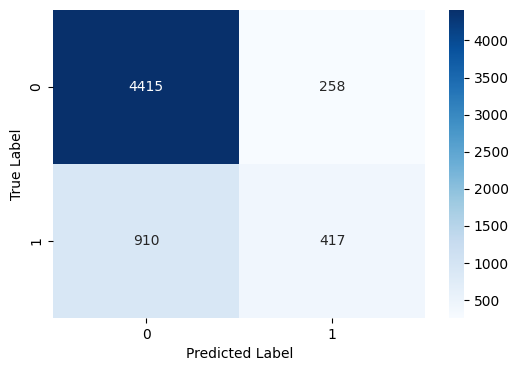

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.62      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.460510,36.13%
1,Adaboost,0.829108,0.617778,27.66%


In [715]:
visualization(y_test, X_test, model_adaboost, 'Adaboost')

In [716]:
model_adaboost.get_params()

{'algorithm': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 2,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 1.0,
 'n_estimators': 80,
 'random_state': 42}

In [717]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(estimator=model_adaboost, param_grid=params, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)
model_adaboost_grid = grid_search.best_estimator_

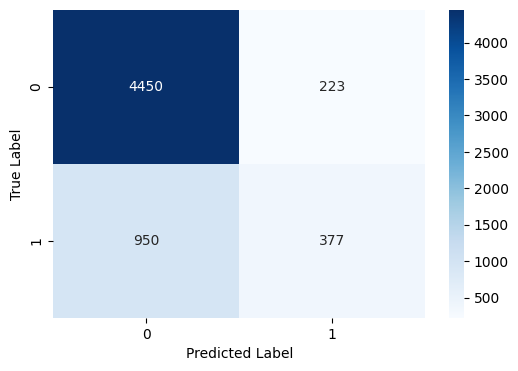

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.63      0.28      0.39      1327

    accuracy                           0.80      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.80      0.77      6000



,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.460510,36.13%
1,Adaboost,0.829108,0.617778,27.66%
2,Adaboost_grid,0.824074,0.628333,27.38%


In [718]:
visualization(y_test, X_test, model_adaboost_grid, 'Adaboost_grid')

#Model z Pipeline - Supervised + Unsupervised Learning#

In [719]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [720]:
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_test_standarized = scaler.transform(X_test)

##liczenie n_clusters#

Text(0.5, 0, 'Number of clusters')

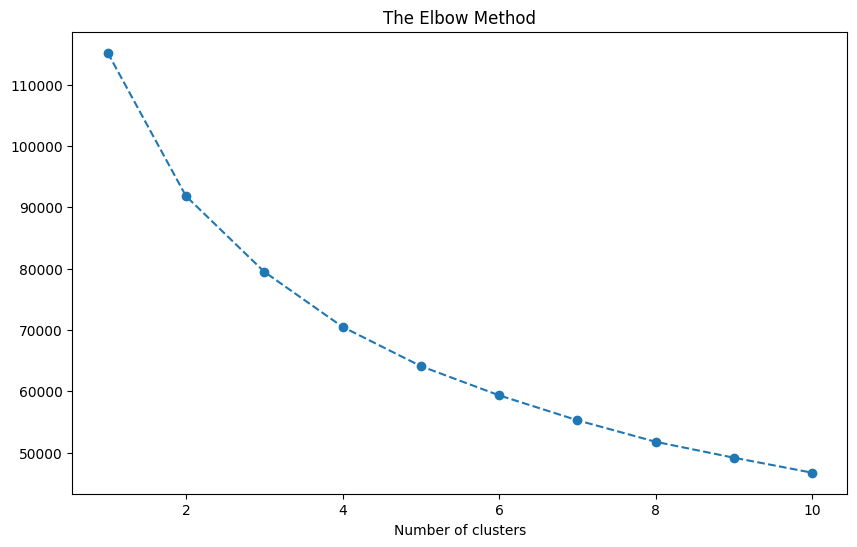

In [721]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10).fit(X_train_standarized)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

In [722]:
def add_clusters_labels(X):
  km = KMeans(n_clusters = 6, random_state = 42, n_init = 10).fit(X)
  return np.c_[X, km.labels_]

In [723]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer

In [724]:
pipeline = Pipeline([
    ('features' , FeatureUnion([
        ('orginal' , FunctionTransformer(lambda X: X)),
        ('clusters' , FunctionTransformer(add_clusters_labels))
    ])),
    ('model' , RandomForestClassifier(n_estimators=100, random_state=42))
])

In [725]:
pipeline.fit(X_train_standarized, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('orginal',
                                                 FunctionTransformer(func=<function <lambda> at 0x7a238875d300>)),
                                                ('clusters',
                                                 FunctionTransformer(func=<function add_clusters_labels at 0x7a238875c860>))])),
                ('model', RandomForestClassifier(random_state=42))])

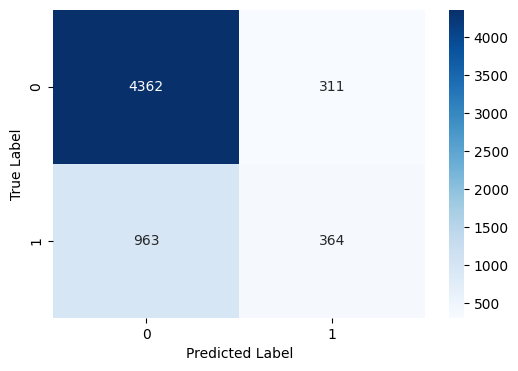

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4673
           1       0.54      0.27      0.36      1327

    accuracy                           0.79      6000
   macro avg       0.68      0.60      0.62      6000
weighted avg       0.76      0.79      0.76      6000



,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.460510,36.13%
1,Adaboost,0.829108,0.617778,27.66%
2,Adaboost_grid,0.824074,0.628333,27.38%
3,Pipeline1,0.819155,0.539259,32.08%


In [726]:
visualization(y_test, X_test_standarized, pipeline, 'Pipeline1')

In [727]:
pipeline.get_params()

{'memory': None,
 'steps': [('features',
   FeatureUnion(transformer_list=[('orginal',
                                   FunctionTransformer(func=<function <lambda> at 0x7a238875d300>)),
                                  ('clusters',
                                   FunctionTransformer(func=<function add_clusters_labels at 0x7a238875c860>))])),
  ('model', RandomForestClassifier(random_state=42))],
 'transform_input': None,
 'verbose': False,
 'features': FeatureUnion(transformer_list=[('orginal',
                                 FunctionTransformer(func=<function <lambda> at 0x7a238875d300>)),
                                ('clusters',
                                 FunctionTransformer(func=<function add_clusters_labels at 0x7a238875c860>))]),
 'model': RandomForestClassifier(random_state=42),
 'features__n_jobs': None,
 'features__transformer_list': [('orginal',
   FunctionTransformer(func=<function <lambda> at 0x7a238875d300>)),
  ('clusters',
   FunctionTransformer(func=<fun

In [728]:
params = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, scoring='precision')
grid_search.fit(X_train_standarized, y_train)
pipeline_grid = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

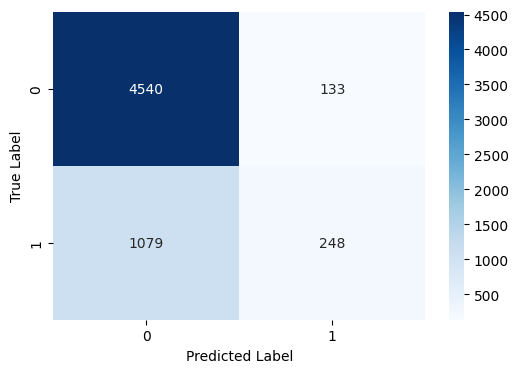

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4673
           1       0.65      0.19      0.29      1327

    accuracy                           0.80      6000
   macro avg       0.73      0.58      0.59      6000
weighted avg       0.77      0.80      0.75      6000



,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.460510,36.13%
1,Adaboost,0.829108,0.617778,27.66%
2,Adaboost_grid,0.824074,0.628333,27.38%
3,Pipeline1,0.819155,0.539259,32.08%
4,Pipeline_grid,0.807973,0.650919,27.06%


In [729]:
visualization(y_test, X_test_standarized, pipeline_grid, 'Pipeline_grid')

#Model z Ensemble#

In [730]:
from sklearn.ensemble import VotingClassifier

In [731]:
moodel_voting = VotingClassifier(estimators = [('forest', model_forest),
                                                ('adaboost', model_adaboost_grid),
                                                ('pipeline', pipeline_grid)],
                                 voting = 'soft')
moodel_voting.fit(X_train_standarized, y_train)

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(random_state=42)),
                             ('adaboost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                 learning_rate=0.1,
                                                 random_state=42)),
                             ('pipeline',
                              Pipeline(steps=[('features',
                                               FeatureUnion(transformer_list=[('orginal',
                                                                               FunctionTransformer(func=<function <lambda> at 0x7a238875d300>)),
                                                                              ('clusters',
                                                                               FunctionTransformer(func=<function add_clusters_labels at 0x7a238875c860>))])),
                                              ('model',
                                               RandomForestClassifier(max_depth=3,
                                                                      n_estimators=150,
                                                                      random_state=42))]))],
                 voting='soft')

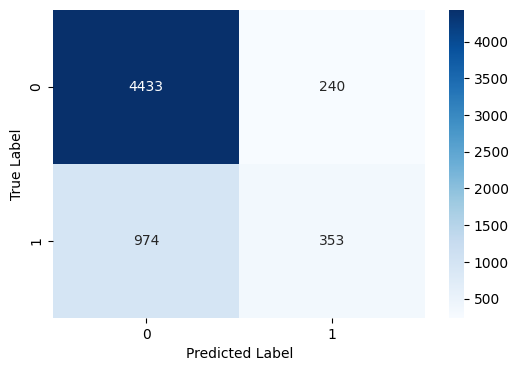

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.60      0.27      0.37      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.61      0.62      6000
weighted avg       0.77      0.80      0.77      6000



,Model_Name,Precission - 0,Precission - 1,Procent Straty
0,Random Forest,0.816882,0.460510,36.13%
1,Adaboost,0.829108,0.617778,27.66%
2,Adaboost_grid,0.824074,0.628333,27.38%
3,Pipeline1,0.819155,0.539259,32.08%
4,Pipeline_grid,0.807973,0.650919,27.06%
5,Ensemble,0.819863,0.595278,29.24%


In [732]:
visualization(y_test, X_test_standarized, moodel_voting, 'Ensemble')

Jak widac najlepszy model przyniósł bankowi 72% zysk